# TODO: Task 1 - Approximating Functions

In [2]:
# All imports
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import lstsq
from scipy.spatial.distance import cdist
from utils import*
%reload_ext autoreload
%autoreload 2

# Load datasets with linear and non-linear function data
data_A = np.loadtxt('../../data/linear_function_data.txt')
data_B = np.loadtxt('../../data/nonlinear_function_data.txt')

In [3]:
data_A

array([[ 1.62434536,  1.21825749],
       [-0.61175641, -0.45884164],
       [-0.52817175, -0.39612373],
       ...,
       [-0.06962454, -0.05222762],
       [ 0.35387043,  0.26540929],
       [-0.18695502, -0.14020239]])

### TODO: Part 1 - Approximating function in dataset A with a linear function

Text(0.5, 1.0, 'Linear function')

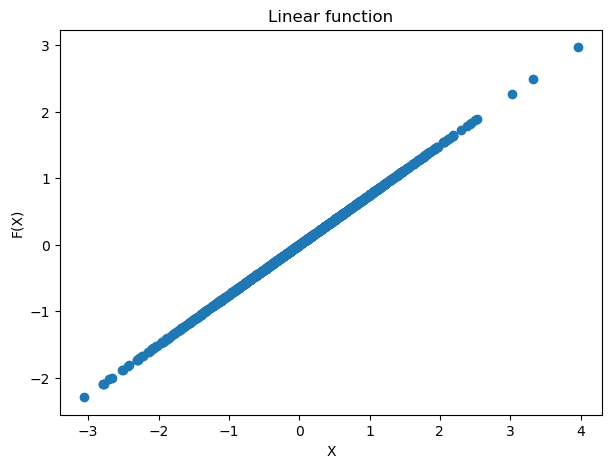

In [4]:
fig, ax = plt.subplots(1,1, figsize =(7,5))
X_A = data_A[:,0]
Y_A = data_A[:,1]

ax.scatter(X_A, Y_A)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")

In [5]:
# Function to add jitter
def add_jitter(arr, noise_level=0.05):
    return arr + np.random.normal(0, noise_level, arr.shape)

Text(0.5, 1.0, 'Linear function')

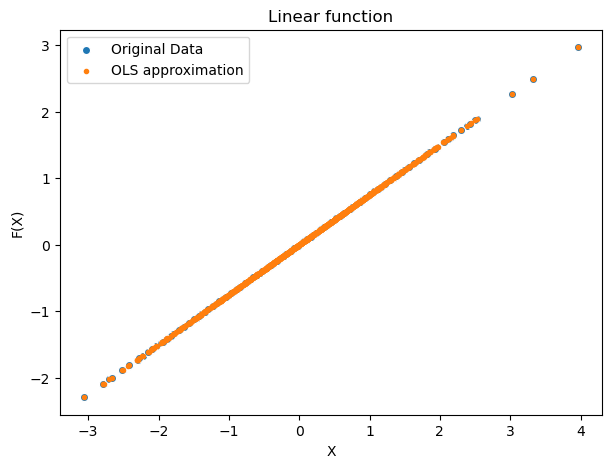

In [6]:
coef = least_squares(X_A[:, np.newaxis], Y_A)[0]
approx_y_1 = np.dot(X_A, coef)

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_A,Y_A,label = 'Original Data', edgecolor = 'w')
ax.scatter(X_A, approx_y_1, label= 'OLS approximation', marker = '.')
plt.legend()
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")

### TODO: Part 2 -  Approximating function in dataset B with a linear function

Text(0.5, 1.0, 'Non Linear function')

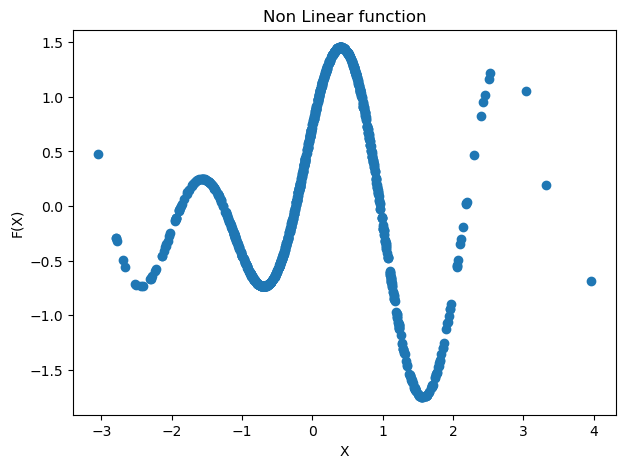

In [7]:
fig, ax = plt.subplots(1,1, figsize =(7,5))
X_B = data_B[:,0]
Y_B = data_B[:,1]

ax.scatter(X_B, Y_B)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Non Linear function")

Text(0.5, 1.0, 'Linear function')

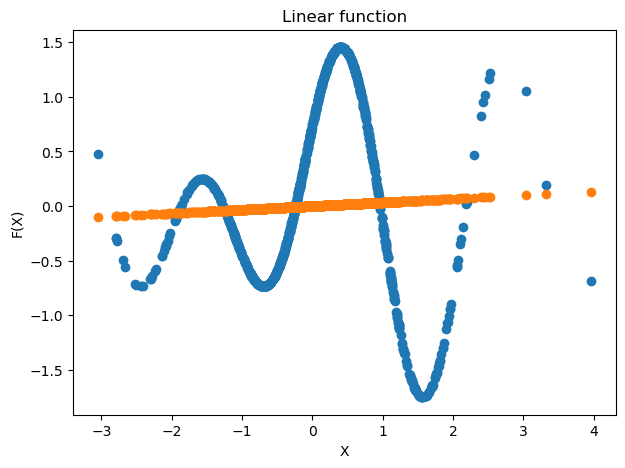

In [8]:
coef_2 = least_squares(X_B[:,np.newaxis], Y_B)[0]
approx_y_2 = np.dot(X_B,coef_2)

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_B,Y_B)
ax.scatter(X_B, approx_y_2)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")

### TODO: Part 3.1 - Approximating function in dataset B with radial basis functions

f(x) = c_1 * phi_1(x)+ c_2 * phi_2(x)+ ... + c_L * phi_L(x)
     = PHI(X) @ C.T

PHI(X) = (phi_1(x), phi_2(x), ..., phi_L(x))

find C!

must also tune parameters epsilon and L

In [39]:
eps_list = np.linspace(0.05,0.5,50)
L_list = np.arange(10,500,50)
residuals = {}
res_list = []
c = 0

for eps in eps_list:
    for L in L_list:
        c+=1
        print(c)
        phi_x_b = approx_non_linear_function(X_B,Y_B,L,eps)
        res =  lstq_residuals(phi_x_b.T, Y_B)
        if len(res.shape) == 0:
            print(res)
            residuals[(eps,L)] = res
            res_list.append(res)

1
341.8946931117787
2
3
4
5
6
7
8
9
10
11
281.10577746325487
12
13
14
15
16
17
18
19
20
21
222.3267058126521
22
23
24
25
26
27
28
29
30
31
168.48400821711817
32
33
34
35
36
37
38
39
40
41
122.07423861351762
42
43
44
45
46
47
48
49
50
51
84.44505732791698
52
53
54
55
56
57
58
59
60
61
55.78936598320599
62
63
64
65
66
67
68
69
70
71
35.315077333247714
72
73
74
75
76
77
78
79
80
81
21.560672698024163
82
83
84
85
86
87
88
89
90
91
12.821879801170113
92
93
94
95
96
97
98
99
100
101
7.526090000003291
102
103
104
105
106
107
108
109
110
111
4.435718334752306
112
113
114
115
116
117
118
119
120
121
2.6841091976284357
122
123
124
125
126
127
128
129
130
131
1.7149649627657473
132
133
134
135
136
137
138
139
140
141
1.1937826056121528
142
143
144
145
146
147
148
149
150
151
0.9293196224085278
152
153
154
155
156
157
158
159
160
161
0.8168181153559434
162
163
164
165
166
167
168
169
170
171
0.8013204791718149
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193


In [40]:
np.arange(len(res_list)-4)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

(0.0, 10.0)

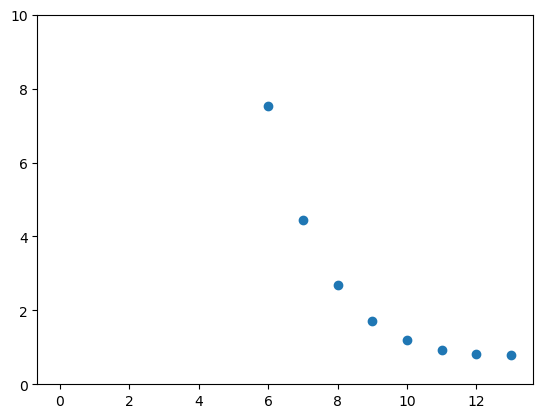

In [41]:
plt.scatter(np.arange(len(res_list)-4), res_list[4:])
plt.ylim(0,10)

In [42]:
list(residuals.keys())[list(residuals.values()).index(np.min(res_list))]

(0.20612244897959187, 10)

In [43]:
residuals

{(0.05, 10): 341.8946931117787,
 (0.05918367346938776, 10): 281.10577746325487,
 (0.06836734693877551, 10): 222.3267058126521,
 (0.07755102040816328, 10): 168.48400821711817,
 (0.08673469387755103, 10): 122.07423861351762,
 (0.09591836734693879, 10): 84.44505732791698,
 (0.10510204081632654, 10): 55.78936598320599,
 (0.1142857142857143, 10): 35.315077333247714,
 (0.12346938775510205, 10): 21.560672698024163,
 (0.1326530612244898, 10): 12.821879801170113,
 (0.14183673469387756, 10): 7.526090000003291,
 (0.1510204081632653, 10): 4.435718334752306,
 (0.1602040816326531, 10): 2.6841091976284357,
 (0.16938775510204085, 10): 1.7149649627657473,
 (0.1785714285714286, 10): 1.1937826056121528,
 (0.18775510204081636, 10): 0.9293196224085278,
 (0.1969387755102041, 10): 0.8168181153559434,
 (0.20612244897959187, 10): 0.8013204791718149}

In [ ]:
index = np.arange(len(res))

Text(0.5, 1.0, 'Non Linear function')

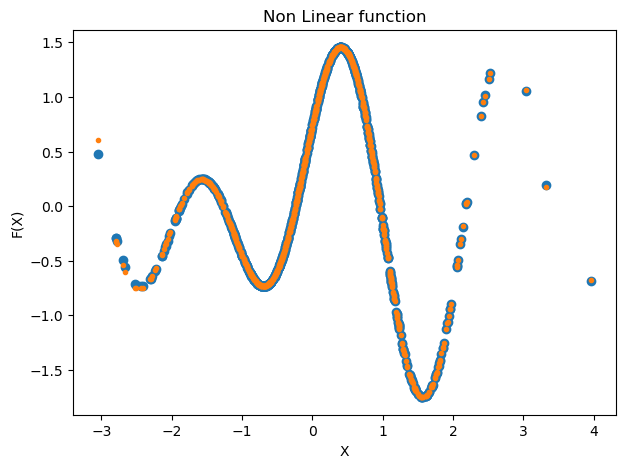

In [45]:
L = 100
phi_x_b = approx_non_linear_function(X_B,L,0.2)
C =  least_squares(phi_x_b.T, Y_B)
approx_y_3 = np.dot(phi_x_b.T, C)

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_B,Y_B, label = 'Original Data')
ax.scatter(X_B, approx_y_3, marker= '.', label= 'RBF approximation')
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Non Linear function")

Built in RBF from scipy:

Text(0.5, 1.0, 'Non Linear function')

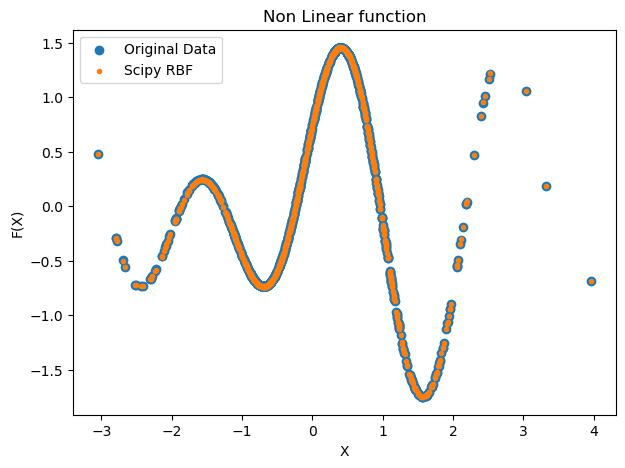

In [16]:
#we cheat with interpolation built-in function
approx_y_cheat = built_int_interpolator(np.array([X_B]).T,Y_B,0.9)

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_B,Y_B, label = 'Original Data')
ax.scatter(X_B, approx_y_cheat, marker= '.', label= 'Scipy RBF')
plt.legend()
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Non Linear function")

Text(0.5, 1.0, 'Linear function')

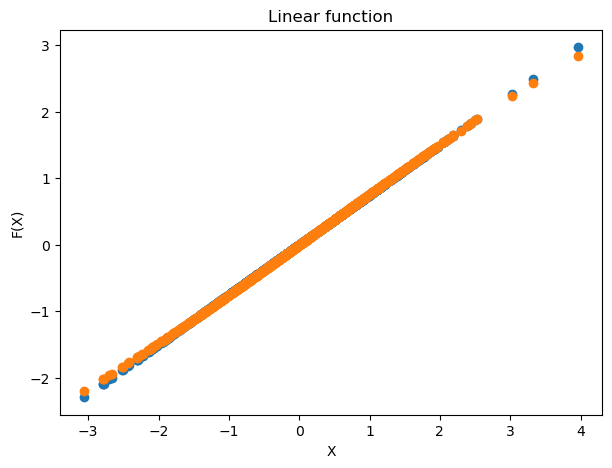

In [46]:
L = 100
phi_x_a = approx_non_linear_function(X_A,L,2)
approx_y_3 = transform(phi_x_a.T, least_squares(phi_x_a.T, Y_A))

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_A,Y_A)
ax.scatter(X_A, approx_y_3)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")